In [2]:
import numpy as np
from matplotlib import pyplot as plt

<h1 align="center">Volume 4: Timber Harvest.</h1>

    Bryant McArthur
    Math 439
    March 16, 2023

# Problem 1

Write a function that takes as input scalars $x_{0}$, $k$, $r$, and a final time $T$ and solves the optimal control problem stated above using the RK4 method described above. The function will return the time-step and the values of x and u at the specific time-steps.

In [3]:
def solve_tree_harvest(x0, k, r, T, N=1000, delta=0.001):
    """
    Solves for the optimal control for the tree harvesting problem 
    with the given parameters.
    
    Parameters:
        x0 - initial amount of timber being produced
        k - investment growth rate
        r - interest rate
        T - final time
        N - number of time steps
        delta - error tolerance for convergence
    Returns:
        t (ndarray) - timesteps
        x (ndarray) - timber production values
        u (ndarray) - the optimal control
    """
    t = np.linspace(0,T,N+1)
    h = T/N
    h2 = h/2
    
    x = np.zeros(N+1)
    alpha = np.zeros(N+1)
    u = np.zeros(N+1)
    
    f = lambda x,u: k*u*x
    g = lambda t, alpha, u: u*(np.exp(-r*t)-k*alpha) - np.exp(-r*t)
    
    x[0] = x0
    alpha[-1] = 0
    
    while True:
        oldu = u.copy()
        oldx = x.copy()
        oldalpha = alpha.copy()
                
        # Find x from RK4
        for i in range(N):
            K1 = f(x[i], u[i])
            K2 = f(x[i] + h2*K1, (u[i]+u[i+1])/2)
            K3 = f(x[i] + h2*K2, (u[i]+u[i+1])/2)
            K4 = f(x[i] + h*K3, u[i+1])
            x[i+1] = x[i] + (h/6) * (K1 + 2*K2 + 2*K3 + K4)
        
        # Go backwards for alphas
        for i in range(N):
            # Use RK4
            j = N-i
            K1 = g(t[j], alpha[j], u[j])
            K2 = g(t[j] - h2, alpha[j]-h2*K1, (u[j]+u[j-1])/2)
            K3 = g(t[j] - h2, alpha[j]-h2*K2, (u[j]+u[j-1])/2)
            K4 = g(t[j] - h, alpha[j]-h*K3, u[j-1])
            alph = (h/6)*(K1 + 2*K2 + 2*K3 + K4)
            alpha[j-1] = alpha[j] - alph
        
        phi = x*(k*alpha-np.exp(-r*t))
        
        for i in range(N+1):
            if phi[i] > 0:
                u[i] = 1
        
        
        # Check for convergence
        if (np.sum(np.abs(oldu - u)) < delta*np.sum(np.abs(u))
            and np.sum(np.abs(oldx - x)) < delta*np.sum(np.abs(x))
            and np.sum(np.abs(oldalpha - alpha)) < delta*np.sum(np.abs(alpha))):
            break
            
    return t, x, u

# Problem 2

Using your function from problem 1, plot time vs. timber production ($x$) and plot time vs. reinvestment percentage ($u$) for the following values: $x_{0} = 100$, $k = 1$, $r = 0$, and $T = 5$.


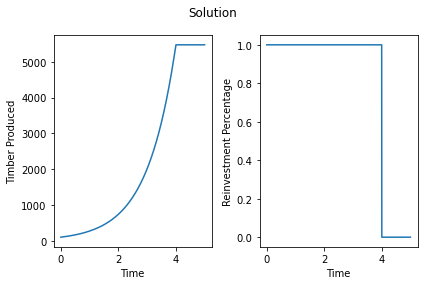

In [4]:
x0 = 100
k = 1
r = 0
T = 5

t,x,u = solve_tree_harvest(x0,k,r,T)

plt.subplot(121)
plt.plot(t,x)
plt.xlabel("Time")
plt.ylabel("Timber Produced")
plt.subplot(122)
plt.plot(t,u)
plt.xlabel("Time")
plt.ylabel("Reinvestment Percentage")
plt.suptitle("Solution")
plt.tight_layout()
plt.show()

# Problem 3

Plot the same graphs that you did in problem 2, but instead for the following values: $x_{0} = 100$, $k = 0.3$, $r = 0.05$, and $T = 5$. At what time does the switching point occur?

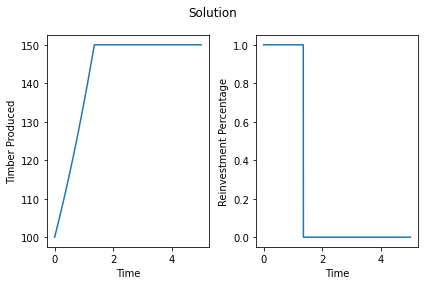

In [5]:
x0 = 100
k = .3
r = .05
T = 5

t,x,u = solve_tree_harvest(x0,k,r,T)

plt.subplot(121)
plt.plot(t,x)
plt.xlabel("Time")
plt.ylabel("Timber Produced")
plt.subplot(122)
plt.plot(t,u)
plt.xlabel("Time")
plt.ylabel("Reinvestment Percentage")
plt.suptitle("Solution")
plt.tight_layout()
plt.show()

# Problem 4

Now use the same parameters as in problem 3, but vary the initial value of the timber production capacity ($x_{0}$). You should try a smaller value, a slightly larger value, and fairly larger value for $x_{0}$. What do you notice about the optimal controls (are they the same or are they different)?


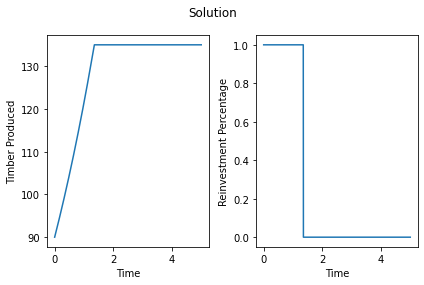

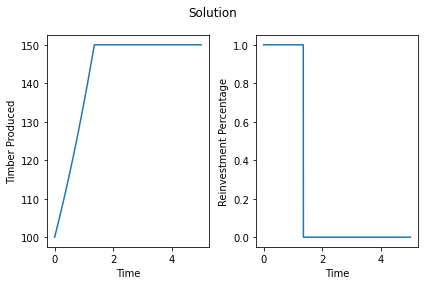

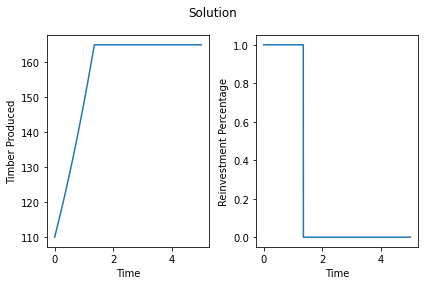

In [6]:
for x0 in [90,100,110]:
    k = .3
    r = .05
    T = 5
    
    t,x,u = solve_tree_harvest(x0,k,r,T)

    plt.subplot(121)
    plt.plot(t,x)
    plt.xlabel("Time")
    plt.ylabel("Timber Produced")
    plt.subplot(122)
    plt.plot(t,u)
    plt.xlabel("Time")
    plt.ylabel("Reinvestment Percentage")
    plt.suptitle("Solution")
    plt.tight_layout()
    plt.show()